In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [86]:
#Load airbnb dataset
airbnb_raw_data=pd.read_csv("Airbnb_Open_Data.csv")

#display first 5 rows of the data
airbnb_raw_data.head()

<ipython-input-86-d4f115ac004f>:2: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [87]:
#display column names
airbnb_raw_data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [88]:
#display some info about data
airbnb_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [89]:
#display some statistics about data
airbnb_raw_data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [90]:
# Check for null values in the dataset and sort in descending order
null_counts = airbnb_raw_data.isnull().sum().sort_values(ascending=False)
print(null_counts)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

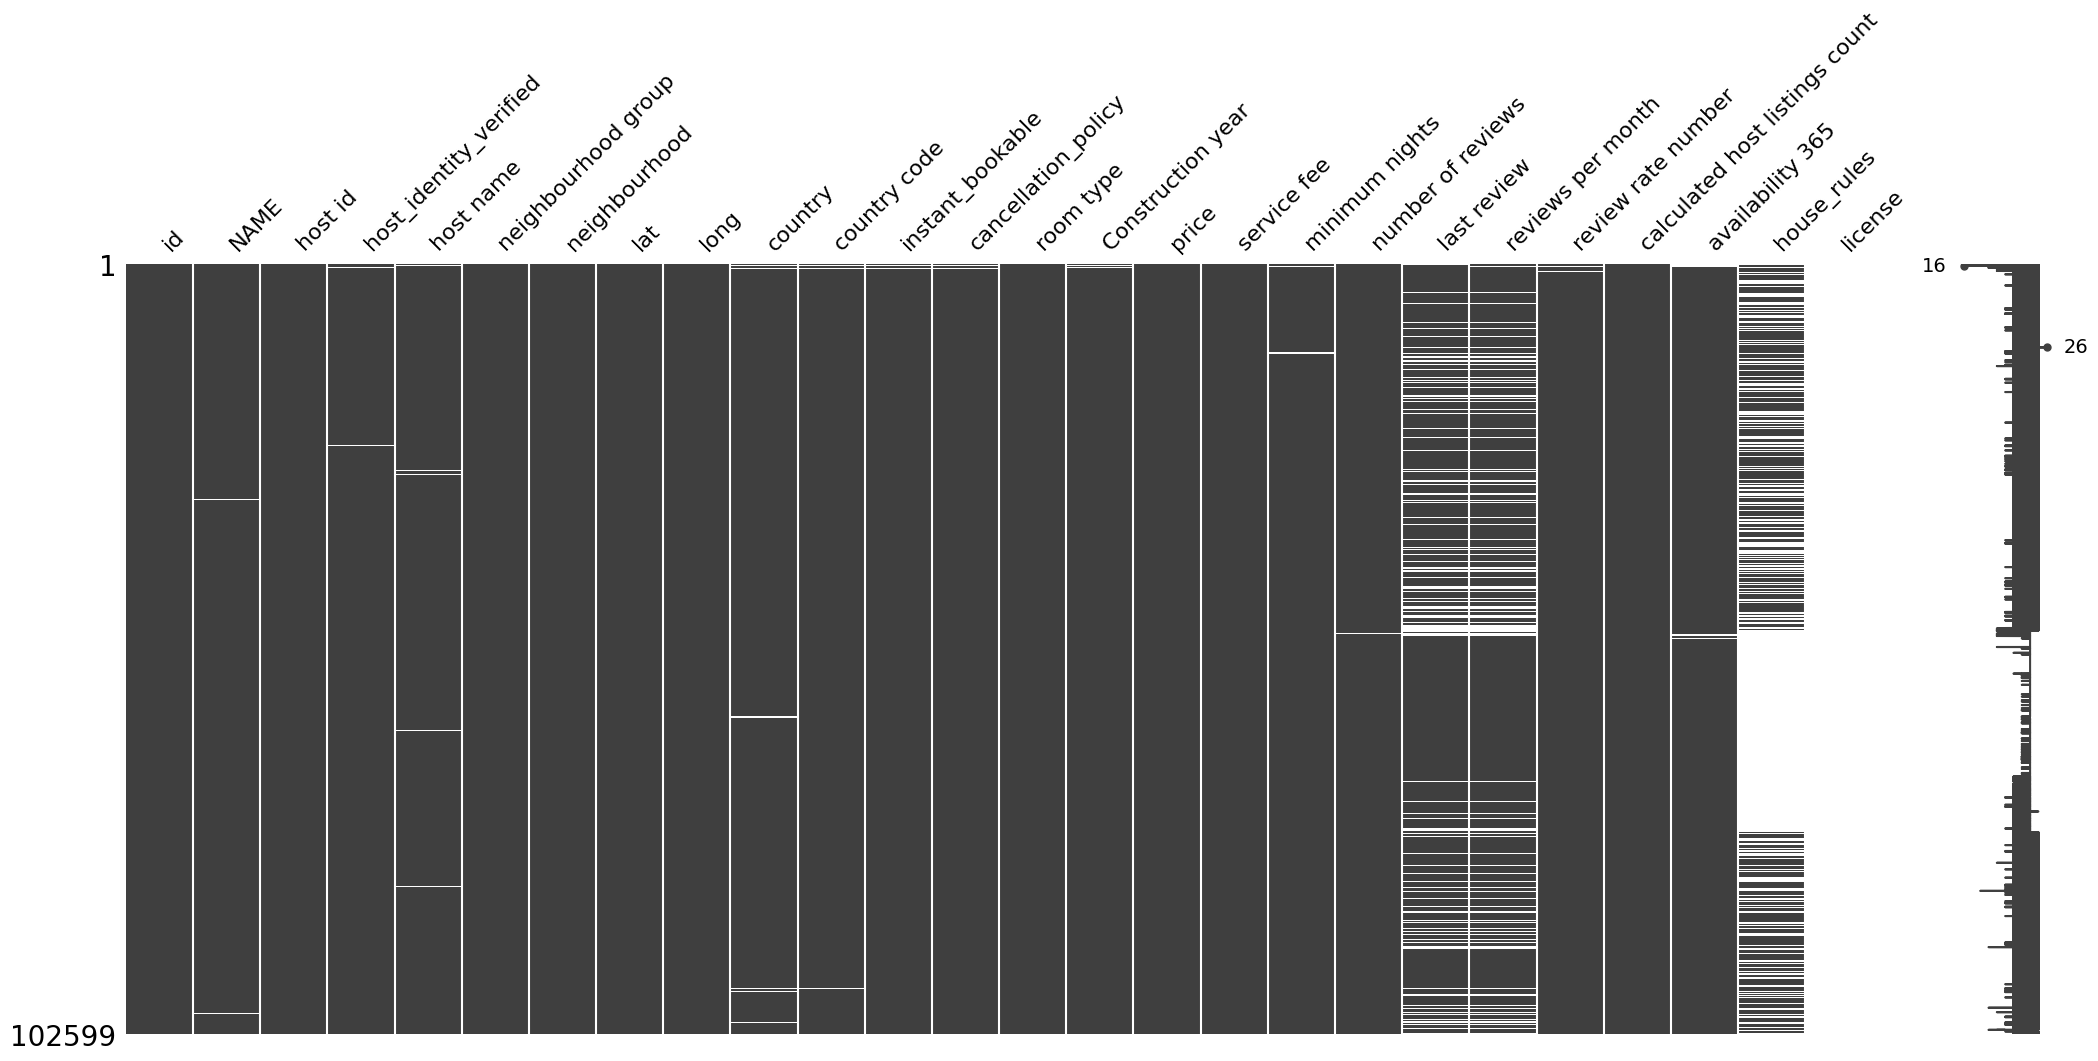

In [91]:
msno.matrix(airbnb_raw_data)
plt.show()

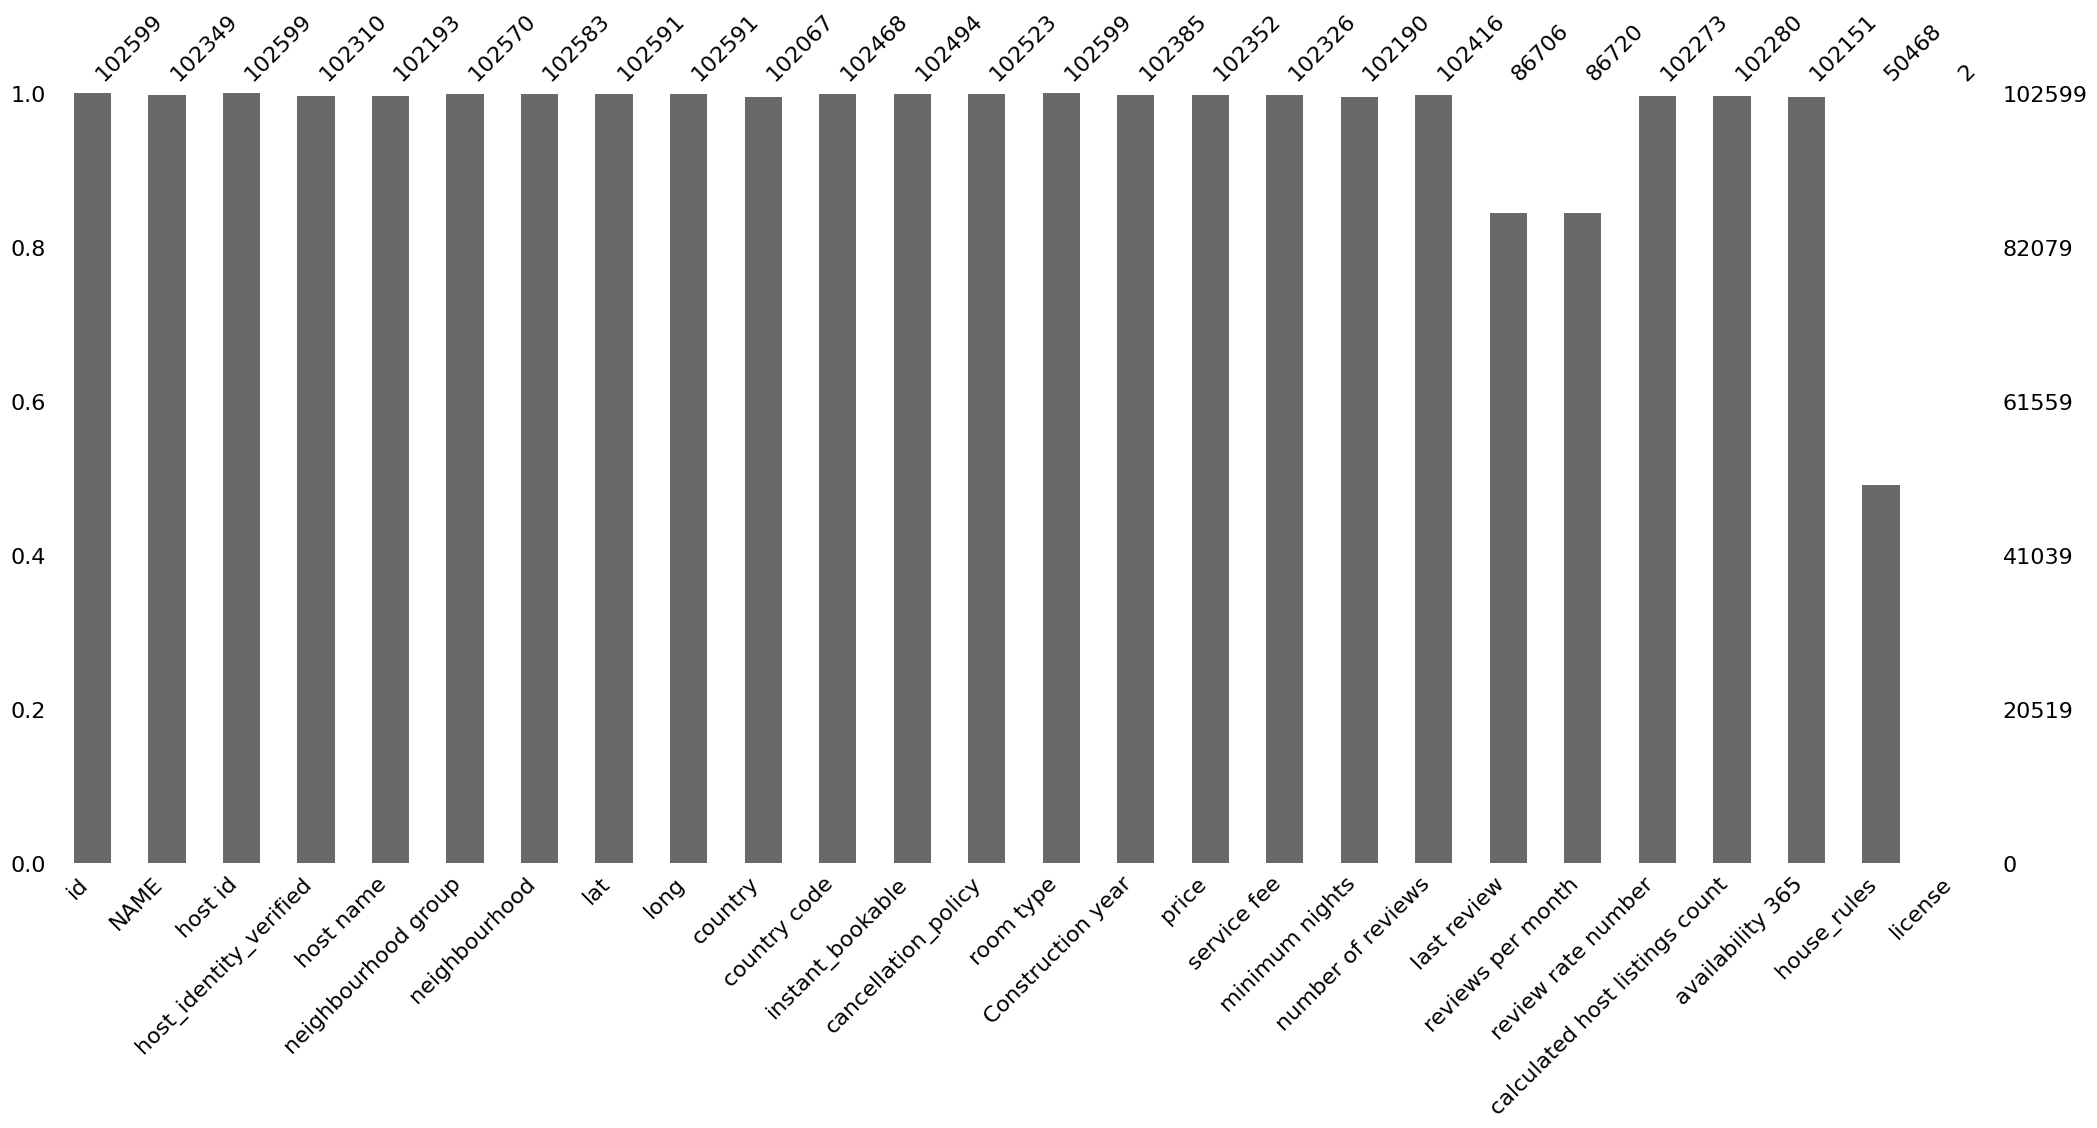

In [92]:
msno.bar(airbnb_raw_data)
plt.show()

In [93]:
#check the count of different types of rooms
airbnb_raw_data['room type'].value_counts()

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


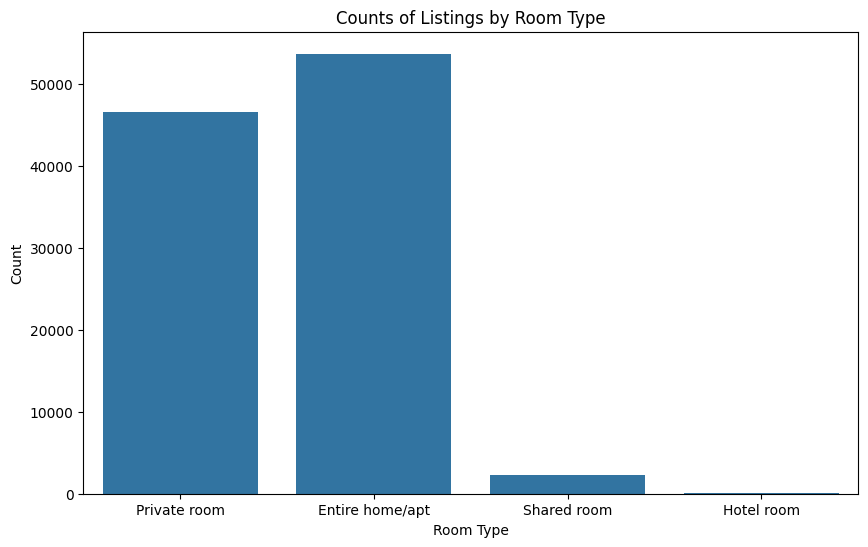

In [94]:
# Bar Plot: Counts of Listings by Room Type
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=airbnb_raw_data)
plt.title('Counts of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

filling missing 'neighbourhood group' values using another column 'neighbourhood'

In [95]:
# Filter rows with missing 'neighbourhood group'
missing_neighbourhood_group = airbnb_raw_data[airbnb_raw_data['neighbourhood group'].isnull()]

# Display latitude and longitude,neighbourhood for rows with missing 'neighbourhood group'
print(missing_neighbourhood_group[['id', 'lat', 'long','neighbourhood']])

# Create the mapping between neighbourhood group and neighbourhood
neighbourhood_and_neighbourhood_group = airbnb_raw_data.dropna(subset=['neighbourhood group']).set_index('neighbourhood')['neighbourhood group'].to_dict()
neighbourhood_and_neighbourhood_group

             id       lat      long       neighbourhood
74      1042206  40.83139 -73.94095  Washington Heights
75      1042759  40.68346 -73.96374        Clinton Hill
76      1043311  40.72828 -73.98801        East Village
77      1043863  40.76865 -73.95058     Upper East Side
78      1044415  40.75038 -73.90334            Woodside
90      1051043  40.71156 -73.96218        Williamsburg
91      1051595  40.70032 -73.93830            Bushwick
92      1052148  40.68233 -73.97261    Prospect Heights
148     1083076  40.72354 -73.98295        East Village
161     1090256  40.71088 -73.95055        Williamsburg
168     1094122  40.68843 -73.96408        Clinton Hill
196     1109587  40.74859 -73.99671             Chelsea
206     1115110  40.67870 -73.97262    Prospect Heights
241     1134440  40.80942 -73.93936         East Harlem
249     1138859  40.68800 -73.91710            Bushwick
262     1146039  40.88057 -73.83572         Eastchester
287     1159846  40.71031 -73.95830        Willi

{'Kensington': 'Brooklyn',
 'Midtown': 'Manhattan',
 'Harlem': 'Manhattan',
 'Clinton Hill': 'Brooklyn',
 'East Harlem': 'Manhattan',
 'Murray Hill': 'Manhattan',
 'Bedford-Stuyvesant': 'Brooklyn',
 "Hell's Kitchen": 'Manhattan',
 'Upper West Side': 'Manhattan',
 'Chinatown': 'Manhattan',
 'South Slope': 'Brooklyn',
 'West Village': 'Manhattan',
 'Williamsburg': 'Brooklyn',
 'Fort Greene': 'Brooklyn',
 'Chelsea': 'Manhattan',
 'Crown Heights': 'Brooklyn',
 'Park Slope': 'Brooklyn',
 'Windsor Terrace': 'Brooklyn',
 'Inwood': 'Manhattan',
 'East Village': 'Manhattan',
 'Greenpoint': 'Brooklyn',
 'Bushwick': 'Brooklyn',
 'Flatbush': 'Brooklyn',
 'Lower East Side': 'Manhattan',
 'Prospect-Lefferts Gardens': 'Brooklyn',
 'Long Island City': 'Queens',
 'Kips Bay': 'Manhattan',
 'SoHo': 'Manhattan',
 'Upper East Side': 'Manhattan',
 'Prospect Heights': 'Brooklyn',
 'Brooklyn Heights': 'Brooklyn',
 'Carroll Gardens': 'Brooklyn',
 'Washington Heights': 'Manhattan',
 'Gowanus': 'Brooklyn',
 'Fla

In [96]:
# Function to fill missing 'neighbourhood group'
def fill_neighbourhood_group(row):
    if pd.isna(row['neighbourhood group']):
        return neighbourhood_and_neighbourhood_group.get(row['neighbourhood'], None)
    return row['neighbourhood group']

# Apply the function to fill missing values
airbnb_raw_data['neighbourhood group'] = airbnb_raw_data.apply(fill_neighbourhood_group, axis=1)

In [97]:
#check again for missing data in neighbourhood group
airbnb_raw_data['neighbourhood group'].isnull().sum()

0

In [98]:
#check unique values in neighbourhood group
print('unique neighbourhood group: ',airbnb_raw_data['neighbourhood group'].unique())

unique neighbourhood group:  ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' 'Staten Island'
 'Bronx']


In [99]:
# Define a mapping of misspelled neighborhood names to correct names
neighbourhood_corrections = {
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'

}

# Apply the corrections
airbnb_raw_data['neighbourhood group'] = airbnb_raw_data['neighbourhood group'].replace(neighbourhood_corrections)

# Get the unique neighborhood groups
unique_neighbourhood_groups = airbnb_raw_data['neighbourhood group'].unique()

print("Unique neighbourhood groups:", unique_neighbourhood_groups)

Unique neighbourhood groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [100]:
# Convert all values in the 'neighbourhood group' column to uppercase
airbnb_raw_data['neighbourhood group'] = airbnb_raw_data['neighbourhood group'].str.upper()

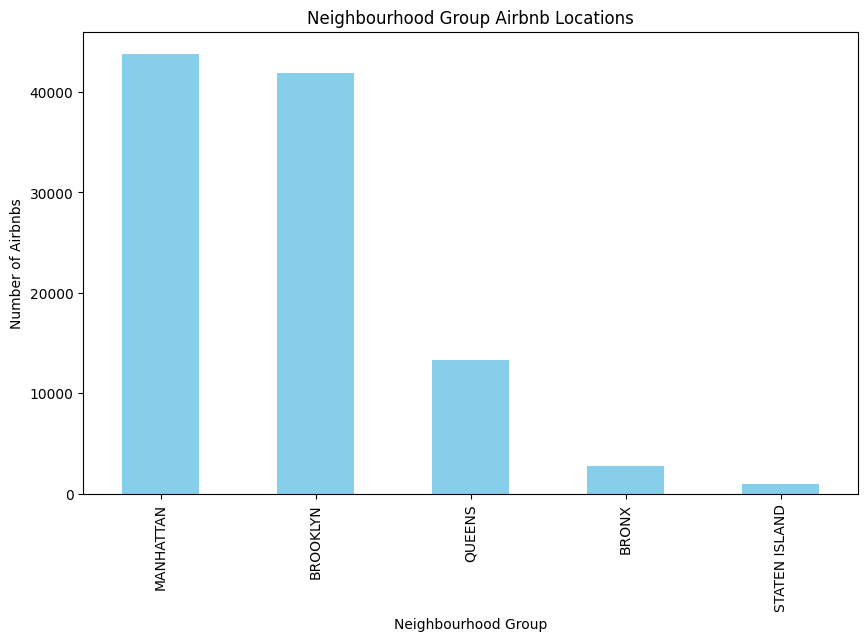

In [101]:
plt.figure(figsize=(10, 6))
airbnb_raw_data['neighbourhood group'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Neighbourhood Group Airbnb Locations')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Airbnbs')
plt.show()

Conc. : Manhattan has the highest number of Airbnb listings.

Neighbourhood Column

In [102]:
# Drop Nulls in neighbourhood Column
airbnb_raw_data = airbnb_raw_data.dropna(subset=['neighbourhood'])
airbnb_raw_data['neighbourhood'].isnull().sum()

0

In [103]:
#Count how many listings are in each neighbourhood.
airbnb_raw_data['neighbourhood'].value_counts()

,count
neighbourhood,
Bedford-Stuyvesant,7937
Williamsburg,7775
Harlem,5466
Bushwick,4982
Hell's Kitchen,3965
Upper West Side,3860
Upper East Side,3680
East Village,3492
Midtown,3390


Deal with price & service fee columns

In [104]:
# Convert all values in the price column to string, then remove dollar signs, commas, and spaces, and convert to numeric
airbnb_raw_data['price'] = airbnb_raw_data['price'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)
# Remove dollar signs, commas, and spaces, then convert the service fee column to numeric
airbnb_raw_data['service fee'] = airbnb_raw_data['service fee'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)
# Calculate the average price per neighbourhood and sort by price
avg_price_per_neighbourhood = airbnb_raw_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index()

print(airbnb_raw_data['price'].head())
print(airbnb_raw_data['price'].dtype)
print(airbnb_raw_data['service fee'].head())
print(airbnb_raw_data['service fee'].dtype)
print('Average price per neighbourhood and sort by price')
print(avg_price_per_neighbourhood)

0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64
float64
0    193.0
1     28.0
2    124.0
3     74.0
4     41.0
Name: service fee, dtype: float64
float64
Average price per neighbourhood and sort by price
              neighbourhood        price
0                  New Dorp  1045.000000
1    Chelsea, Staten Island  1042.000000
2            Fort Wadsworth  1024.000000
3               Little Neck   817.750000
4             Jamaica Hills   812.904762
..                      ...          ...
219            Richmondtown   373.400000
220            Breezy Point   309.888889
221               Rossville   300.666667
222          Spuyten Duyvil   293.444444
223         Lighthouse Hill   107.666667

[224 rows x 2 columns]


In [105]:
import plotly.express as px

fig = px.bar(avg_price_per_neighbourhood,
             x='price',
             y='neighbourhood',
             orientation='h',
             title='Average Price per Neighbourhood',
             labels={'price': 'Average Price', 'neighbourhood': 'Neighbourhood'})

fig.update_layout(height=1000)
fig.show()

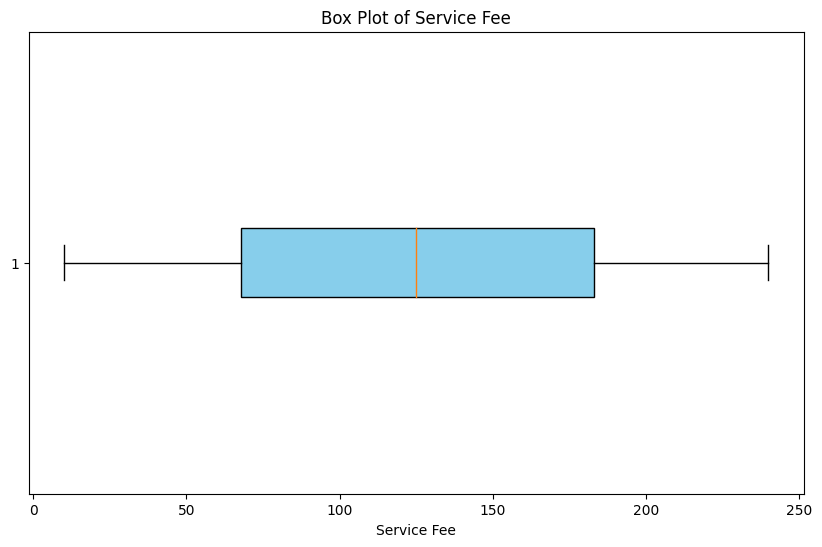

In [106]:
# Plotting the box plot for the service fee
plt.figure(figsize=(10, 6))
plt.boxplot(airbnb_raw_data['service fee'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Service Fee')
plt.xlabel('Service Fee')
plt.show()


In [107]:
# Fill NaN values with the mean of the service fee
mean_fee = airbnb_raw_data['service fee'].mean()
airbnb_raw_data['service fee'].fillna(mean_fee, inplace=True)
#check for null values
airbnb_raw_data['service fee'].isnull().sum()

0

unique Values : [ 966.  142.  620. ... 1184.  905.  309.]
how many null values in price :  246


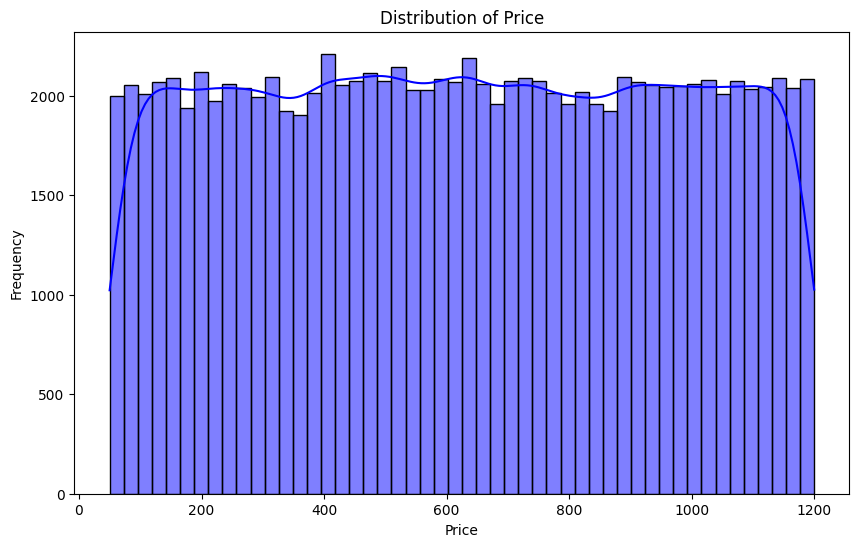

In [108]:
print('unique Values :', airbnb_raw_data['price'].unique())
print('how many null values in price : ',airbnb_raw_data['price'].isnull().sum())

# Create a histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_raw_data['price'], bins=50, kde=True, color='blue')
# Set the title and labels for the plot
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [109]:
# impute Null values in price with median
from sklearn.impute import SimpleImputer

# impute missing values with median
imputer = SimpleImputer(strategy='median')
airbnb_raw_data['price'] = imputer.fit_transform(airbnb_raw_data[['price']])
#check null values again
airbnb_raw_data['price'].isnull().sum()

0

In [110]:
# Calculate average price per neighborhood group
average_price_per_group = airbnb_raw_data.groupby('neighbourhood group')['price'].mean().reset_index()

# Sort the results for better readability
average_price_per_group = average_price_per_group.sort_values(by='price', ascending=False)

# Display the results
print(average_price_per_group)

  neighbourhood group       price
3              QUEENS  630.151858
0               BRONX  627.860302
1            BROOKLYN  626.570302
4       STATEN ISLAND  624.489005
2           MANHATTAN  622.418467


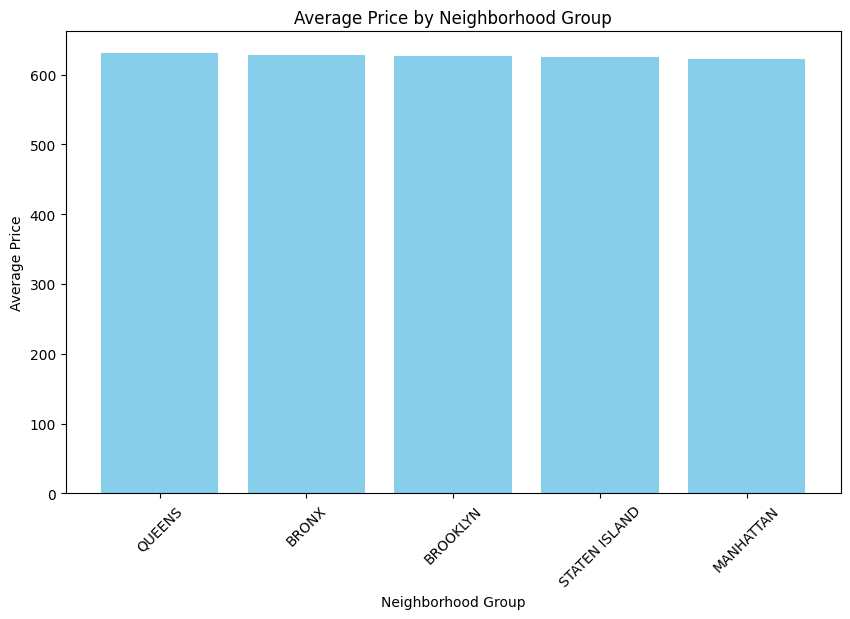

In [111]:
# Plot average price per neighborhood group
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_group['neighbourhood group'], average_price_per_group['price'], color='skyblue')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

review rate number Column

Number of Null values in review rate number column:  326


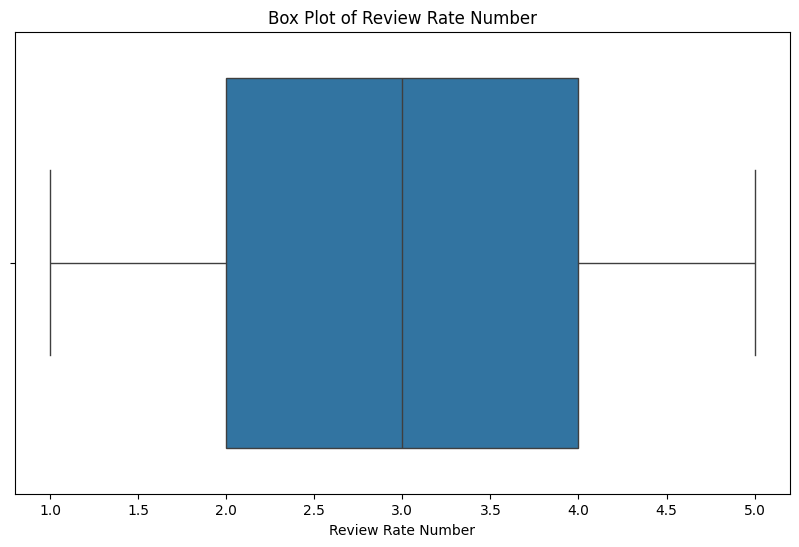

In [112]:
#check for null values
print('Number of Null values in review rate number column: ', airbnb_raw_data['review rate number'].isnull().sum())

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=airbnb_raw_data['review rate number'].dropna())
plt.title('Box Plot of Review Rate Number')
plt.xlabel('Review Rate Number')
plt.show()

In [113]:
# Calculate the mode of the 'review rate number' column
mode_value = airbnb_raw_data['review rate number'].mode()[0]

# Impute null values with the mode
airbnb_raw_data['review rate number'].fillna(mode_value, inplace=True)

# Check for null values again
null_count = airbnb_raw_data['review rate number'].isnull().sum()
print(f"Number of null values in 'review rate number' after imputation: {null_count}")


Number of null values in 'review rate number' after imputation: 0


In [114]:
#rating value counts
airbnb_raw_data['review rate number'].value_counts()

,count
review rate number,
5.0,23692
4.0,23323
3.0,23262
2.0,23095
1.0,9211


number of reviews Column

In [115]:
# Calculate the median number of reviews per neighborhood
median_reviews_per_neighbourhood = airbnb_raw_data.groupby('neighbourhood')['number of reviews'].median()

# Define a function to fill missing values
def fill_number_of_reviews(row):
    if pd.isnull(row['number of reviews']):
        return median_reviews_per_neighbourhood[row['neighbourhood']]
    else:
        return row['number of reviews']

# Apply the function to fill missing values
airbnb_raw_data['number of reviews'] = airbnb_raw_data.apply(fill_number_of_reviews, axis=1)
airbnb_raw_data['number of reviews'].isnull().sum()



0

Last Review  Column

In [116]:
airbnb_raw_data['last review'].isnull().sum()

15893

In [117]:
airbnb_raw_data['last review'] = pd.to_datetime(airbnb_raw_data['last review'], errors='coerce')

# Find the earliest date in the 'last review' column
earliest_date = airbnb_raw_data['last review'].min()

print(f"The earliest date in the 'last review' column is: {earliest_date}")

The earliest date in the 'last review' column is: 2012-07-11 00:00:00


In [118]:
# replace nulls with earliest date in the 'last review' column
airbnb_raw_data['last review'].fillna(pd.Timestamp('2012-07-11'), inplace=True)
# Check nulls again
airbnb_raw_data['last review'].isnull().sum()

0

In [119]:
# Extract features from 'last_review'
airbnb_raw_data['year'] = airbnb_raw_data['last review'].dt.year
airbnb_raw_data['month'] = airbnb_raw_data['last review'].dt.month
airbnb_raw_data['day'] = airbnb_raw_data['last review'].dt.day

airbnb_raw_data = airbnb_raw_data.drop(columns=['last review'])
airbnb_raw_data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,year,month,day
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,BROOKLYN,Kensington,40.64749,-73.97237,United States,...,9.0,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,2021,10,19
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,MANHATTAN,Midtown,40.75362,-73.98377,United States,...,45.0,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,2022,5,21
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,MANHATTAN,Harlem,40.80902,-73.94190,United States,...,0.0,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,2012,7,11
3,1002755,NaN,85098326012,unconfirmed,Garry,BROOKLYN,Clinton Hill,40.68514,-73.95976,United States,...,270.0,4.64,4.0,1.0,322.0,NaN,NaN,2019,7,5
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,MANHATTAN,East Harlem,40.79851,-73.94399,United States,...,9.0,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,2018,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,BROOKLYN,Williamsburg,40.70862,-73.94651,United States,...,0.0,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,2012,7,11
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,MANHATTAN,Morningside Heights,40.80460,-73.96545,United States,...,1.0,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN,2015,7,6
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,BROOKLYN,Park Slope,40.67505,-73.98045,United States,...,0.0,NaN,5.0,1.0,342.0,NaN,NaN,2012,7,11
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,QUEENS,Long Island City,40.74989,-73.93777,United States,...,5.0,0.10,3.0,1.0,386.0,NaN,NaN,2015,10,11


reviews per month Column

In [120]:
airbnb_raw_data['reviews per month'].isnull().sum()

15879

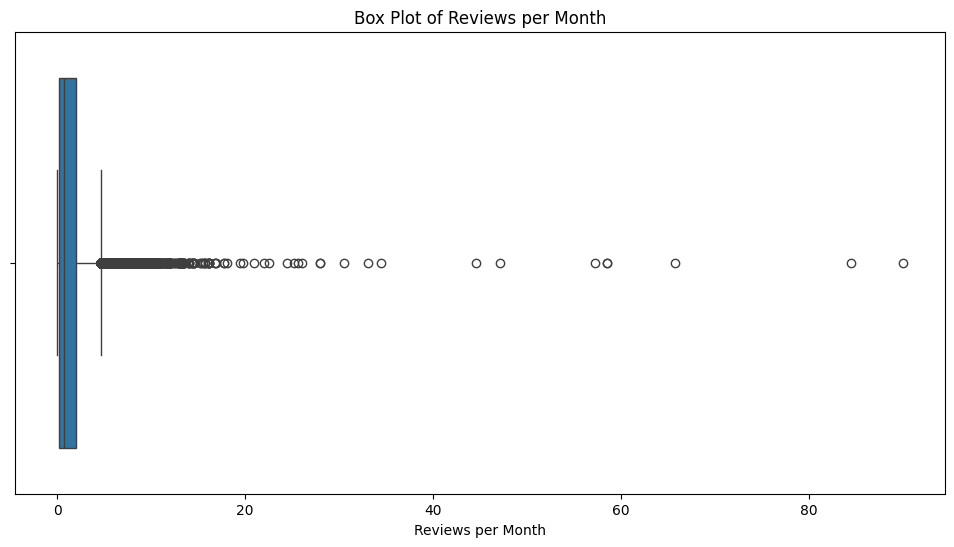

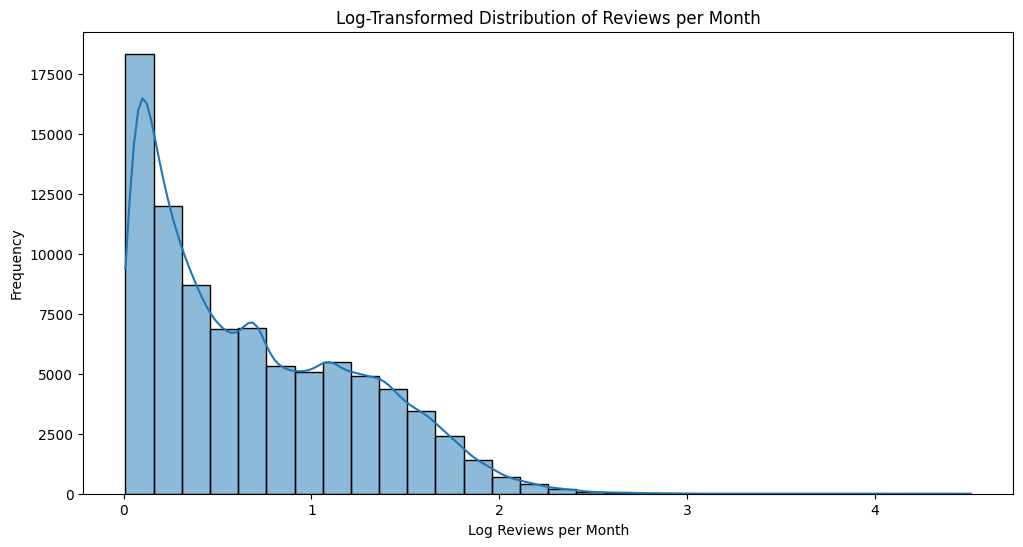

In [121]:
# Box Plot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=airbnb_raw_data['reviews per month'].dropna())
plt.xlabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month')
plt.show()

# Log transform the data
airbnb_raw_data['log_reviews_per_month'] = np.log1p(airbnb_raw_data['reviews per month'])

plt.figure(figsize=(12, 6))
sns.histplot(airbnb_raw_data['log_reviews_per_month'].dropna(), bins=30, kde=True)
plt.xlabel('Log Reviews per Month')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Reviews per Month')
plt.show()

The data is right skewed so we will use log transformation to normalize data then apply median imputation to fill null values

for outliers we will use combination of log transformation and capping to reduce the impact of outliers while retaining all data points.

In [122]:
# Calculate median of the log-transformed data
median_log_reviews_per_month = airbnb_raw_data['log_reviews_per_month'].median()

# Impute missing values in the log-transformed data
airbnb_raw_data['log_reviews_per_month'].fillna(median_log_reviews_per_month, inplace=True)

Number of outliers before imputation: 735
              id                                              NAME  \
1615     1893301               Centrally located and spacious apt.   
1628     1900480               Beautiful duplex loft with Skylight   
2016     2114773                      Private Bedroom in Manhattan   
2031     2123057                    Beautiful Bedroom in Manhattan   
2032     2123610                        Great Bedroom in Manhattan   
...          ...                                               ...   
102040  57358028                     Room in Queens, NY, near LGA.   
102338  20336254  Private Bedroom Free parking 10 min to Manhattan   
102345  20340121            Cozy corner near Empire State Building   
102361  20348957          Private Room Midtown Park Avenue, Steal!   
102390  20364974       Near LGA and JFK Airport Cozy Basement Room   

            host id host_identity_verified host name neighbourhood group  \
1615    96020556462            unconfirme

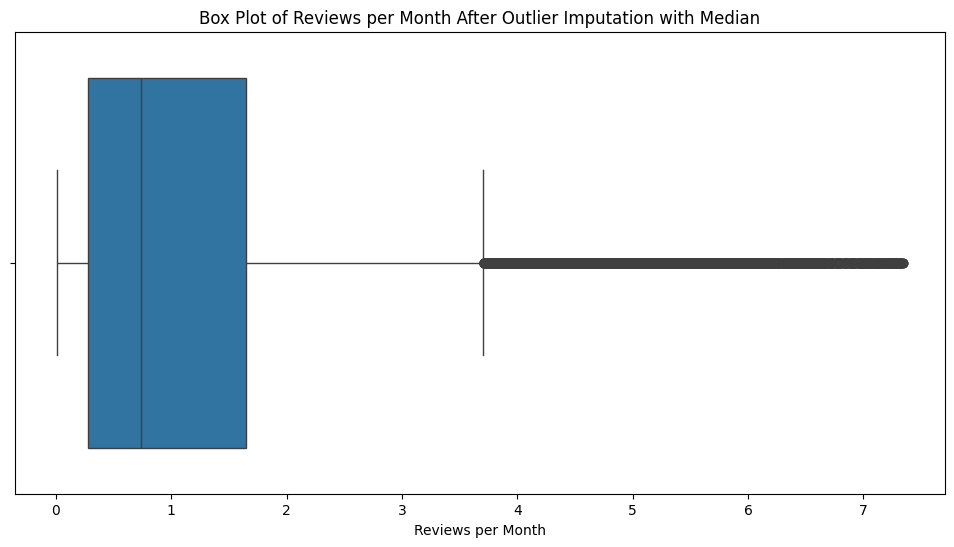

In [123]:
# Calculate Q1 and Q3 for log-transformed data
Q1 = airbnb_raw_data['log_reviews_per_month'].quantile(0.25)
Q3 = airbnb_raw_data['log_reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Subset the dataset to identify outliers before imputation
outliers_before = airbnb_raw_data[(airbnb_raw_data['log_reviews_per_month'] < lower_bound) | (airbnb_raw_data['log_reviews_per_month'] > upper_bound)]
print(f'Number of outliers before imputation: {len(outliers_before)}')
print(outliers_before)

# Calculate the median of log-transformed values
median_value = airbnb_raw_data['log_reviews_per_month'].median()

# Impute outliers with the median value
airbnb_raw_data['log_reviews_per_month'] = airbnb_raw_data['log_reviews_per_month'].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound else x
)

# Subset the dataset to identify outliers after imputation
outliers_after = airbnb_raw_data[(airbnb_raw_data['log_reviews_per_month'] < lower_bound) | (airbnb_raw_data['log_reviews_per_month'] > upper_bound)]
print(f'Number of outliers after imputation: {len(outliers_after)}')

# Inverse transform to get back to the original scale
airbnb_raw_data['reviews per month'] = np.expm1(airbnb_raw_data['log_reviews_per_month'])

# Drop the temporary log column
airbnb_raw_data.drop(columns=['log_reviews_per_month'], inplace=True)

# Verify the results
print(f"Min value after outlier imputation: {airbnb_raw_data['reviews per month'].min()}")
print(f"Max value after outlier imputation: {airbnb_raw_data['reviews per month'].max()}")

# Plot the box plot to visualize the effect
plt.figure(figsize=(12, 6))
sns.boxplot(x=airbnb_raw_data['reviews per month'])
plt.xlabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month After Outlier Imputation with Median')
plt.show()

construction year column

In [124]:
# Calculate the median of the construction year column
median_construction_year = airbnb_raw_data['Construction year'].median()

# Fill the null values in the construction year column with the median
airbnb_raw_data['Construction year'].fillna(median_construction_year, inplace=True)

# check the result
airbnb_raw_data['Construction year'].isnull().sum()

0

Min nights Column

In [125]:
airbnb_raw_data['minimum nights'].fillna(1, inplace=True)
airbnb_raw_data['minimum nights'].isnull().sum()

0

Calculated host listings count Column

In [126]:
# Calculate the median of calculated host listings count for each host name
median_host_listings_count = airbnb_raw_data.groupby('host name')['calculated host listings count'].median()

# Calculate the overall median as a fallback
overall_median = airbnb_raw_data['calculated host listings count'].median()

# Define a function to fill missing values
def fill_host_listings_count(row):
    if pd.isnull(row['calculated host listings count']):
        # Check if the host has a median value, else use the overall median
        if row['host name'] in median_host_listings_count.index and not pd.isnull(median_host_listings_count[row['host name']]):
            return median_host_listings_count[row['host name']]
        else:
            return overall_median
    else:
        return row['calculated host listings count']

# Apply the function to fill missing values
airbnb_raw_data['calculated host listings count'] = airbnb_raw_data.apply(fill_host_listings_count, axis=1)

# Check for remaining null values
print(airbnb_raw_data['calculated host listings count'].isnull().sum())



0


Availability_365 Column

In [127]:
# Check for out-of-range values
out_of_range = airbnb_raw_data[(airbnb_raw_data['availability 365'] < 0) | (airbnb_raw_data['availability 365'] > 365)]
print("Out-of-range values:")
print(out_of_range)

# Correct out-of-range values
airbnb_raw_data['availability 365'] = airbnb_raw_data['availability 365'].apply(lambda x: 0 if x < 0 else (365 if x > 365 else x))

# Remove null values by make it have constant value which is 0
airbnb_raw_data['availability 365'].fillna(0, inplace=True)
#Check Null
airbnb_raw_data['availability 365'].isnull().sum()


Out-of-range values:
             id                                       NAME      host id  \
5       1004098  Large Cozy 1 BR Apartment In Midtown East  45498551794   
9       1006307         Cozy Clean Guest Room - Family Apt  75527839483   
25      1015144     MAISON DES SIRENES1,bohemian apartment  48387947293   
33      1019562          Loft in Williamsburg Area w/ Roof  50968902783   
34      1020114                        back room/bunk beds  25066620900   
...         ...                                        ...          ...   
102582  6085810        Private room in the best part of BK   4746552394   
102584  6086914         2 block walk from the beach in NYC  70051719594   
102588  6089124   Loft Space for Events, Meetings & Shoots  85557432222   
102595  6092990              Best Location near Columbia U  77864383453   
102597  6094094           Big Studio-One Stop from Midtown  11160591270   

       host_identity_verified    host name neighbourhood group  \
5           

0

host_identity_verified Column

In [128]:
# Replace Null values with unconfirmed assuming null value means the host didn't verify himself
airbnb_raw_data['host_identity_verified'].fillna('unconfirmed', inplace=True)
#Check Null
print(airbnb_raw_data['host_identity_verified'].isnull().sum())


0


Instant_bookable Column

In [129]:
# Replace Null values with False assuming null value means it hasn't Instant_bookable Option
airbnb_raw_data['instant_bookable'].fillna('False', inplace=True)
#Check Null
print(airbnb_raw_data['instant_bookable'].isnull().sum())

0


cancellation_policy column

In [130]:
# Remove rows with missing values
airbnb_raw_data.dropna(subset=['cancellation_policy'], inplace=True)
#Check Null
print(airbnb_raw_data['cancellation_policy'].isnull().sum())

0


lat and long Columns

In [131]:
# Drop null values in both lat and long Columns
airbnb_raw_data.dropna(subset=['lat'], inplace=True)
airbnb_raw_data.dropna(subset=['long'], inplace=True)

In [132]:
airbnb_raw_data.isnull().sum()

,0
id,0
NAME,245
host id,0
host_identity_verified,0
host name,405
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,456


In [133]:
# Drop columns 'host name','license' 'country','country code','id','host id' columns
processed_data_1 =airbnb_raw_data.drop(columns=['id','host id','host name','license','country','country code'])

In [134]:
processed_data_1.isnull().sum()

,0
NAME,245
host_identity_verified,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
instant_bookable,0
cancellation_policy,0
room type,0
Construction year,0


In [135]:
# Check for duplicate rows in the dataset
duplicate_rows = processed_data_1.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 3466


In [136]:
# Remove duplicate rows
processed_data_2 = processed_data_1.drop_duplicates()

In [137]:
# Check again
duplicate_rows_1 = processed_data_2.duplicated()
# Count the number of duplicate rows
num_duplicates_1 = duplicate_rows_1.sum()
print(f'Number of duplicate rows: {num_duplicates_1}')

Number of duplicate rows: 0


In [138]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X_train, X_test, y_train, y_test = train_test_split(processed_data_2.drop('price', axis=1), processed_data_2['price'], test_size=0.2, random_state=42)


Process X_train by using NLP

In [139]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fill NaN values with an empty string
X_train['NAME'] = X_train['NAME'].fillna('')
X_train['house_rules'] = X_train['house_rules'].fillna('')

# Function to preprocess text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessingroc
X_train['NAME'] = X_train['NAME'].apply(preprocess_text)
X_train['house_rules'] = X_train['house_rules'].apply(preprocess_text)

# Define vocabulary size and maximum length of sequences
vocab_size = 40000
max_len = 100

# Initialize the tokenizer for NAME
tokenizer_name = Tokenizer(num_words=vocab_size)
tokenizer_name.fit_on_texts(X_train['NAME'])

# Initialize the tokenizer for house_rules
tokenizer_house_rules = Tokenizer(num_words=vocab_size)
tokenizer_house_rules.fit_on_texts(X_train['house_rules'])

# Define a function to preprocess the text data for a given tokenizer
def _preprocess(list_of_text, tokenizer, max_len):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post'
    )

# Preprocess the text data for both columns
X_train['NAME'] = _preprocess(X_train['NAME'], tokenizer_name, max_len)
X_train['house_rules'] = _preprocess(X_train['house_rules'], tokenizer_house_rules, max_len)

# Check the result
print("NAME sequences:\n", X_train['NAME'])
print("house_rules sequences:\n", X_train['house_rules'] )
print("NAME word index:\n", tokenizer_name.word_index)
print("house_rules word index:\n", tokenizer_house_rules.word_index)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


KeyboardInterrupt: 

In [ ]:
X_train['house_rules'].head()

Process X_test by using NLP

In [ ]:
# Fill NaN values with an empty string
X_test['NAME'] = X_test['NAME'].fillna('')
X_test['house_rules'] = X_test['house_rules'].fillna('')

# Apply preprocessing on text
X_test['NAME'] = X_test['NAME'].apply(preprocess_text)
X_test['house_rules'] = X_test['house_rules'].apply(preprocess_text)

# Preprocess the text data for both columns
X_test['NAME'] = _preprocess(X_test['NAME'], tokenizer_name, max_len)
X_test['house_rules'] = _preprocess(X_test['house_rules'], tokenizer_house_rules, max_len)

# Check the result
print("NAME sequences:\n", X_test['NAME'])
print("house_rules sequences:\n", X_test['house_rules'])
print("NAME word index:\n", tokenizer_name.word_index)
print("house_rules word index:\n", tokenizer_house_rules.word_index)


Encoding X_train & X_test

In [ ]:
# Columns to be one-hot encoded
columns_to_encode = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                     'instant_bookable', 'cancellation_policy', 'room type']

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)


In [ ]:
# Remove any duplicate columns
X_train_encoded = X_train_encoded.loc[:, ~X_train_encoded.columns.duplicated()]
X_test_encoded = X_test_encoded.loc[:, ~X_test_encoded.columns.duplicated()]

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Check the result
print("X_train_encoded columns:", X_train_encoded.columns)
print("X_test_encoded columns:", X_test_encoded.columns)


In [ ]:
# RQ3: How effective are traditional machine learning models and deep learning models in predicting listing prices?


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 24.706816723468403
MAE: 2.9760007758522495
R-squared: 0.9944693804008339


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Assuming X_train_encoded, X_test_encoded, y_train, and y_test are already defined
# Here's how you can implement the Gradient Boosting algorithm with GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train_encoded, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions on the test set
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test_encoded)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



In [ ]:
# RQ1: What's the relationship between strict house rules and listing prices?
# Group by strict house rules and calculate average price





In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Fill NaN values with an empty string
house_rules_sentiment = processed_data_2['house_rules'].fillna('')

# Ensure all values are strings
house_rules_sentiment= house_rules_sentiment.astype(str)

# Apply sentiment analysis
house_rules_sentiment = house_rules_sentiment.apply(get_sentiment)




In [ ]:
# Now you have a sentiment score for each house rule
print(house_rules_sentiment[['house_rules', 'house_rules_sentiment']].head())

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'house_rules' column is tokenized and padded
X_house_rules = np.array(X_train['house_rules'].tolist()).reshape(-1, max_len)

# Apply K-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_house_rules)

# Inspect clusters
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(X_train[X_train['cluster'] == cluster]['house_rules'].head(10))
    print("\n")

# Based on the inspection, manually label clusters as strict or not
strict_clusters = [2, 4]  # Example clusters identified as strict
X_train['strict'] = X_train['cluster'].apply(lambda x: 1 if x in strict_clusters else 0)

# Now you can use the 'strict' labels for further analysis or modeling

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to preprocess text
def preprocess_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


# Assuming df is your DataFrame
X_tr, X_tes, y_tr, y_tes = train_test_split(processed_data_2.drop('price', axis=1), processed_data_2['price'], test_size=0.2, random_state=42)

# Fill NaN values with an empty string
X_tr['NAME'] = X_tr['NAME'].fillna('')
X_tr['house_rules'] = X_tr['house_rules'].fillna('')

# Apply preprocessing
X_tr['NAME'] = X_tr['NAME'].apply(preprocess_text_1)
X_tr['house_rules'] = X_tr['house_rules'].apply(preprocess_text_1)

# Define vocabulary size and maximum length of sequences
vocab_size = 40000
max_len = 100

# Initialize the tokenizer for house_rules
tokenizer_house_rules = Tokenizer(num_words=vocab_size)
tokenizer_house_rules.fit_on_texts(X_train['house_rules'])

# Define a function to preprocess the text data for a given tokenizer
def _preprocess(list_of_text, tokenizer, max_len):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post'
    )

# Preprocess the text data for house_rules
X_tr['house_rules'] = _preprocess(X_tr['house_rules'], tokenizer_house_rules, max_len)

# Convert house_rules to numpy array
X_house_rul = np.array(X_tr['house_rules'].tolist())

# Check the shape of X_house_rules
print("Shape of X_house_rules:", X_house_rul.shape)

# Apply K-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X_tr['cluster'] = kmeans.fit_predict(X_house_rules)

# Inspect clusters
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    print(X_tr[X_tr['cluster'] == cluster]['house_rules'].head(10))
    print("\n")

# Based on the inspection, manually label clusters as strict or not
strict_clusters = [2, 4]  # Example clusters identified as strict
X_tr['strict'] = X_tr['cluster'].apply(lambda x: 1 if x in strict_clusters else 0)

# Check the result
print(X_tr[['house_rules', 'cluster', 'strict']].head())


In [ ]:
# Boxplot of prices based on strict house rules
plt.figure(figsize=(10, 6))
sns.boxplot(x='strict_house_rules', y='price', data=processed_data_3)
plt.xlabel('Strict House Rules')
plt.ylabel('Price')
plt.title('Price Distribution by House Rules Strictness')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Prices for strict and non-strict house rules
prices_strict = processed_data_3[processed_data_3['strict_house_rules'] == 1]['price']
prices_non_strict = processed_data_3[processed_data_3['strict_house_rules'] == 0]['price']

# T-test to compare means
t_stat, p_value = ttest_ind(prices_strict, prices_non_strict, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


In [ ]:
# RQ2: What's the relationship between reviews and listing prices?
# Ensure 'review rate number' is treated as a categorical variable
processed_data_2['review rate number'] = processed_data_2['review rate number'].astype('category')

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='review rate number', y='price', data=processed_data_2, inner='box', scale='width', palette='Set3')
plt.title('Violin Plot of Price by Review Rate Number')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.show()

In [ ]:
# Box plot for review rate number categories vs. listing prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_rate_category', y='price', data=processed_data_2)
plt.title('Listing Prices by Review Rate Number')
plt.xlabel('Review Rate Number')
plt.ylabel('Listing Prices')
plt.show()